# DP 1 notebook to make a color diagram of objects in EDFS

Contributors: Agnes, Prakruth, Katherine, Brittney, Jackie, Eric, Sid, Alex 

In [47]:
import re
import numpy as np
import matplotlib.pyplot as plt
import lsst.sphgeom as sphgeom
from astropy import units as u
from lsst.daf.butler import Butler

In [3]:
butler = Butler('dp1', collections="LSSTComCam/DP1")

In [5]:
ra =  np.arange(58.75, 59.5, 0.1)
dec = np.arange(-48.6, -49, 0.1)

In [12]:
# radius is in degree
string_edfs = "CIRCLE 59.15 -48.73 1."
region_edfs = sphgeom.Region.from_ivoa_pos(string_edfs)

In [107]:
string_sv = "CIRCLE 37.86 6.982 1."
region_sv = sphgeom.Region.from_ivoa_pos(string_sv)

In [13]:
region_edfs

Circle(UnitVector3d(0.33824198392581173, 0.5662820495298008, -0.7516096065712965), Angle(0.017453292519943295))

In [108]:
query = "visit.region OVERLAPS :region"
bind_params = {'region': region_sv}


In [109]:
dp1_object_sv_refs = butler.query_datasets('object',where=query,bind=bind_params)

In [26]:

dp1_object_edfs_refs = butler.query_datasets('object',where=query,bind=bind_params)


In [111]:
dp1_object_edfs_refs

[DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2234}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=fed1b9bf-6e0a-41a1-8fcb-7d2f077e2fdf),
 DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2393}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=7c0c2fe1-7044-4b49-bb42-5deb169e7821),
 DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2394}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=3b588e46-f812-4a8a-b9a3-813d5d829e73),
 DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2235}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=0b0d8db0-e247-4b55-af3e-df62cad963bd)]

In [33]:
dp1_object_edfs_refs

[DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2234}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=fed1b9bf-6e0a-41a1-8fcb-7d2f077e2fdf),
 DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2393}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=7c0c2fe1-7044-4b49-bb42-5deb169e7821),
 DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2394}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=3b588e46-f812-4a8a-b9a3-813d5d829e73),
 DatasetRef(DatasetType('object', {skymap, tract}, ArrowAstropy), {skymap: 'lsst_cells_v1', tract: 2235}, run='LSSTComCam/runs/DRP/DP1/v29_0_0/DM-50260/20250417T034317Z', id=0b0d8db0-e247-4b55-af3e-df62cad963bd)]

In [110]:
column_names = ['coord_ra', 'coord_dec', 'g_cModelFlux', 'g_cModel_flag', 
                'i_cModelFlux', 'i_cModel_flag', 'r_cModelFlux', 'r_cModel_flag',
               'g_extendedness', 'r_extendedness', 'i_extendedness']
dp1_object_sv = butler.get(dp1_object_sv_refs[0], parameters={'columns': column_names})

In [120]:
column_names = ['coord_ra', 'coord_dec', 'g_cModelFlux', 'g_cModel_flag', 
                'i_cModelFlux', 'i_cModel_flag', 'r_cModelFlux', 'r_cModel_flag',
               'g_extendedness', 'r_extendedness', 'i_extendedness', 'g_extendedness_flag', 'r_extendedness_flag', 'i_extendedness_flag']
dp1_object_edfs = butler.get(dp1_object_edfs_refs[0], parameters={'columns': column_names})

In [75]:
len(dp1_object_edfs['g_cModelFlux'])

50285

In [44]:
len(dp1_object_edfs['g_cModelFlux'][ dp1_object_edfs['g_cModel_flag'] == False])

45608

In [55]:

dp1_object_edfs_rMag = u.nJy.to( u.ABmag, dp1_object_edfs['r_cModelFlux'])
dp1_object_edfs_gMag = u.nJy.to( u.ABmag, dp1_object_edfs['g_cModelFlux'])
dp1_object_edfs_iMag = u.nJy.to( u.ABmag, dp1_object_edfs['i_cModelFlux'])



In [85]:
# 

dp1_object_edfs['g_extendedness'] == 1

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=True)

In [117]:
mask_stars_sv = (dp1_object_sv['g_extendedness'] == 0) & (dp1_object_sv['r_extendedness'] == 0) & (dp1_object_sv['i_extendedness'] == 0)  



np.sum(mask_stars_sv)

print('g = ', np.sum(dp1_object_sv['g_extendedness'] == 0))
print('i = ', np.sum(dp1_object_sv['i_extendedness'] == 0))
print('r = ', np.sum(dp1_object_sv['r_extendedness'] == 0))



g =  1892
i =  3121
r =  2246


In [123]:
print('g = ', np.sum(dp1_object_edfs['g_extendedness_flag'] == True))
print('i = ', np.sum(dp1_object_edfs['i_extendedness_flag'] == True))
print('r = ', np.sum(dp1_object_edfs['r_extendedness_flag'] == True))




g =  29989
i =  24744
r =  29763


In [127]:
# Mask to cut stars
# galaxies are: 
# they pass extendedness flag and
# they are extended

galaxies_g = (dp1_object_edfs['g_extendedness_flag'] == False) & (dp1_object_edfs['g_extendedness'] == 1)
galaxies_r = (dp1_object_edfs['r_extendedness_flag'] == False) & (dp1_object_edfs['r_extendedness'] == 1)
galaxies_i = (dp1_object_edfs['i_extendedness_flag'] == False) & (dp1_object_edfs['i_extendedness'] == 1)






In [156]:
index_galaxies_g = np.where(galaxies_g.data == True)[0]

In [157]:
index_galaxies_r = np.where(galaxies_r.data == True)[0]

In [158]:
index_galaxies_i = np.where(galaxies_i.data == True)[0]

In [161]:
len(index_galaxies_g)

14980

In [162]:
len(index_galaxies_r)

15508

In [163]:
len(index_galaxies_i)

19346

In [164]:
index_galaxies_i

array([    1,     4,     5, ..., 49881, 49981, 49987], shape=(19346,))

In [165]:
index_galaxies_r

array([    8,    23,    24, ..., 50268, 50269, 50271], shape=(15508,))

In [128]:
np.sum(galaxies_g)

np.int64(14980)

In [129]:
np.sum(galaxies_r)

np.int64(15508)

In [130]:
np.sum(galaxies_i)

np.int64(19346)

In [166]:
a = [2,3,5]
b = [2,4,6]

In [170]:
np.unique(a + b)

array([2, 3, 4, 5, 6])

In [175]:
index_galaxies_i

array([    1,     4,     5, ..., 49881, 49981, 49987], shape=(19346,))

In [177]:
index_galaxies_all = np.unique(np.concatenate((index_galaxies_i, index_galaxies_g, index_galaxies_r)))

In [179]:
index_galaxies_all 

array([    1,     3,     4, ..., 50268, 50269, 50271], shape=(30924,))

In [131]:
15000./50285.

0.2982996917569852

In [105]:
857./50285.

0.01704285572238242

In [96]:
len(dp1_object_edfs['g_extendedness'])

50285

In [97]:
50285-41109

9176

In [98]:
np.sum(mask_stars.data)

np.int64(857)

In [102]:
mask_stars.data

array([False, False, False, ..., False, False, False], shape=(50285,))

In [104]:
np.sum(mask_stars)

np.int64(857)

In [135]:
np.sum(galaxies_g | galaxies_r | galaxies_i)

np.int64(8319)

(-10.0, 10.0)

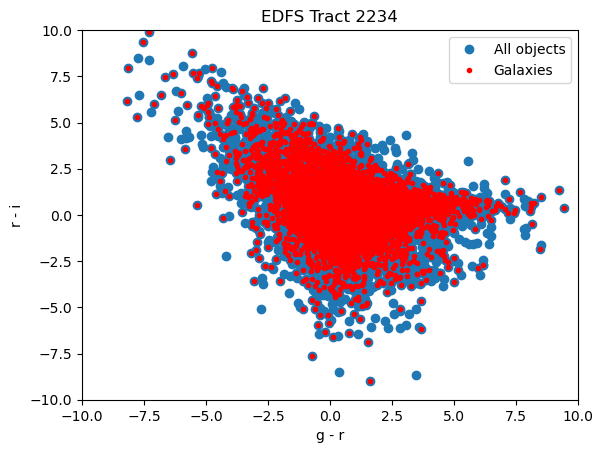

In [184]:
plt.plot( dp1_object_edfs_gMag-dp1_object_edfs_rMag , dp1_object_edfs_rMag-dp1_object_edfs_iMag, 'o', label='All objects')
plt.plot( dp1_object_edfs_gMag[index_galaxies_all]-dp1_object_edfs_rMag[index_galaxies_all] , dp1_object_edfs_rMag[index_galaxies_all]-dp1_object_edfs_iMag[index_galaxies_all], 
        '.', color='red',label='Galaxies')
plt.xlabel('g - r')
plt.ylabel('r - i')
plt.legend()
plt.title('EDFS Tract 2234')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

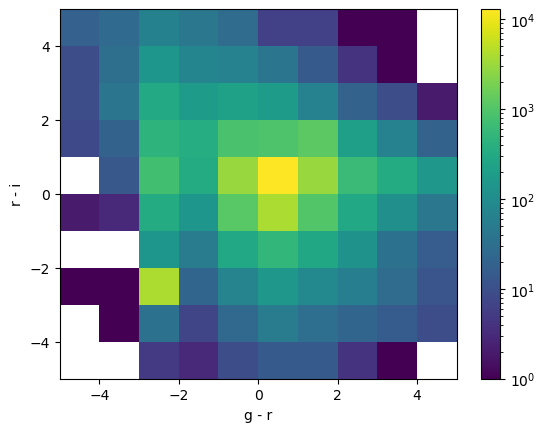

In [72]:
plt.hist2d( dp1_object_edfs_gMag-dp1_object_edfs_rMag , dp1_object_edfs_rMag-dp1_object_edfs_iMag, range = [(-5,5), (-5, 5)],
          norm = 'log')
plt.xlabel('g - r')
plt.ylabel('r - i')
plt.colorbar()
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)

In [73]:
dp1_object_edfs_gr = dp1_object_edfs_gMag-dp1_object_edfs_rMag
dp1_object_edfs_ri = dp1_object_edfs_rMag-dp1_object_edfs_iMag


In [ ]:

dp1_object_edfs_ra_blue = dp1_object_edfs[]

'coord_ra', 'coord_dec'


(array([1.6840e+03, 3.9892e+04, 1.3250e+03, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01]),
 array([15.58422117, 22.16857669, 28.75293221, 35.33728773, 41.92164325,
        48.50599878, 55.0903543 , 61.67470982, 68.25906534, 74.84342086,
        81.42777639]),
 <BarContainer object of 10 artists>)

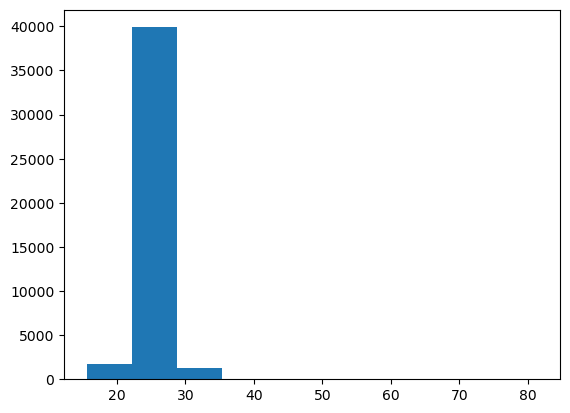

In [58]:
plt.hist(dp1_object_edfs_gMag)

# Shapes

In [187]:
column_names = ['g_hsmShapeRegauss_e1', 'g_hsmShapeRegauss_e2' ]


dp1_object_edfs = butler.get(dp1_object_edfs_refs[0], parameters={'columns': column_names})

In [189]:
# Gets e1 and e2 for our galaxies
dp1_object_edfs[index_galaxies_all]['g_hsmShapeRegauss_e1']
dp1_object_edfs[index_galaxies_all]['g_hsmShapeRegauss_e2']

--
--
--
--
--
--
--
--
--
--
--
